In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.svm import SVR


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score, cohen_kappa_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix



In [82]:
df = pd.read_csv(r'Urban\dataset\water_potability.csv')
df.fillna(df.mean())

print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [50]:
print(df.shape)
print(df.columns)

(3276, 10)
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [51]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


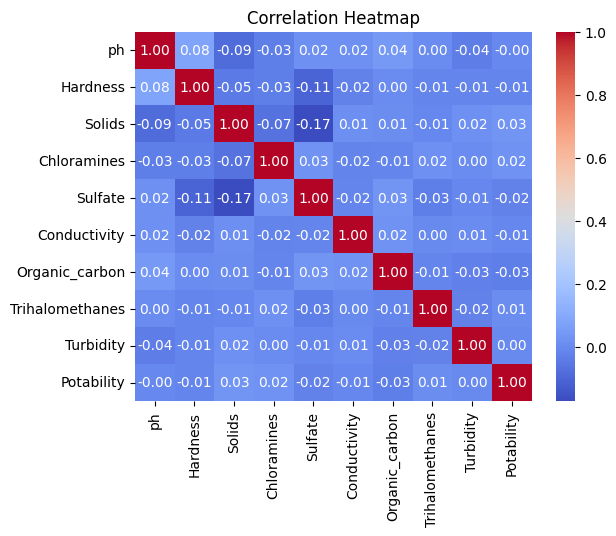

In [52]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

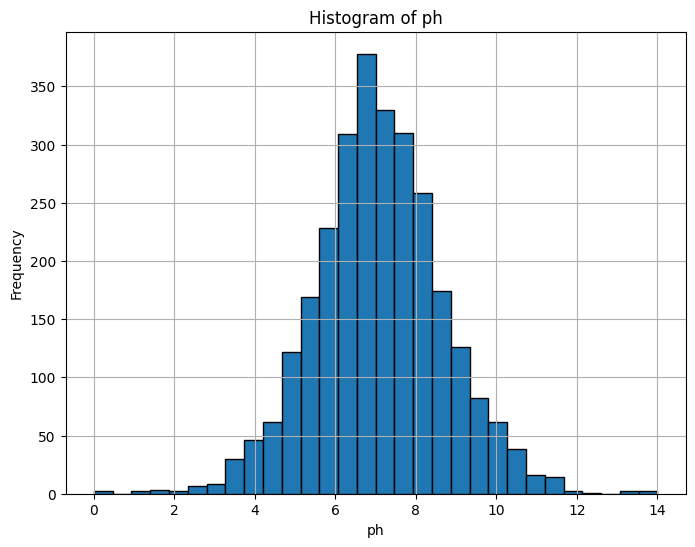

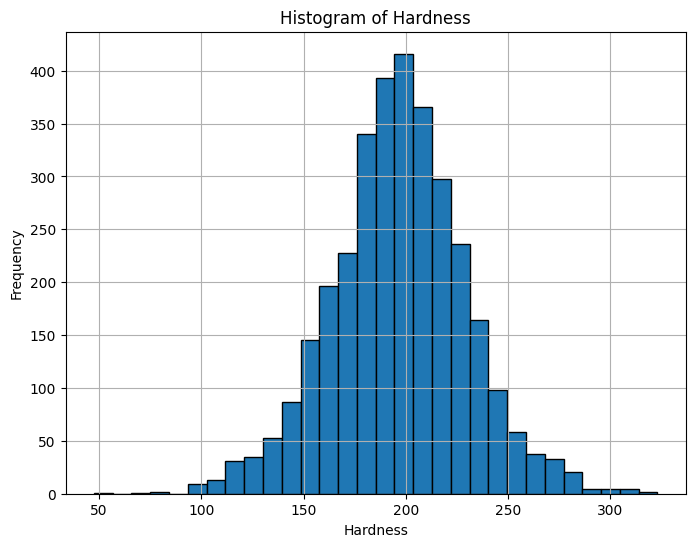

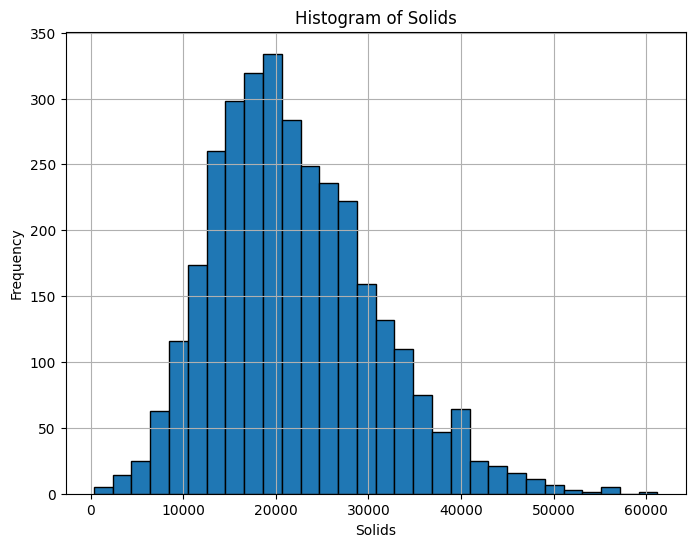

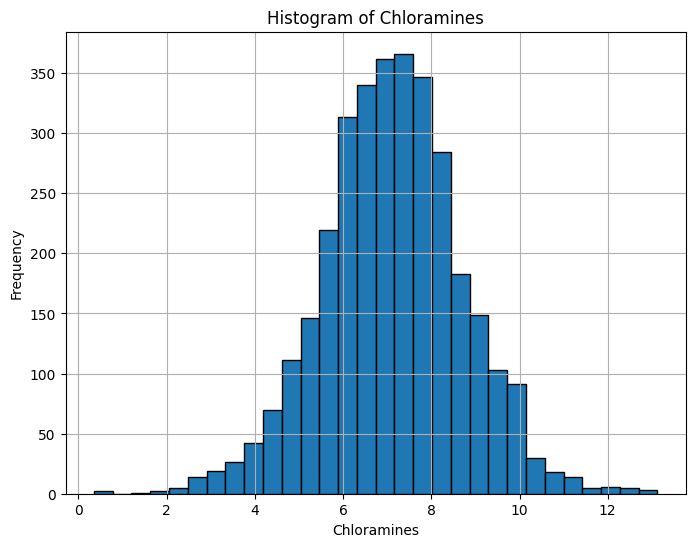

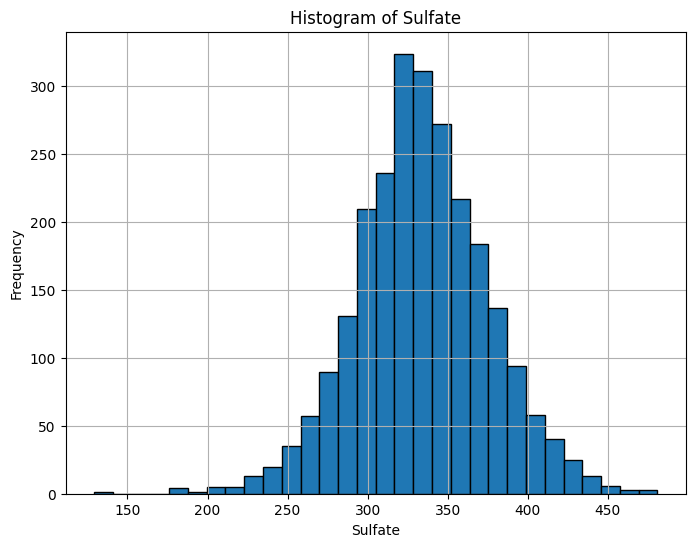

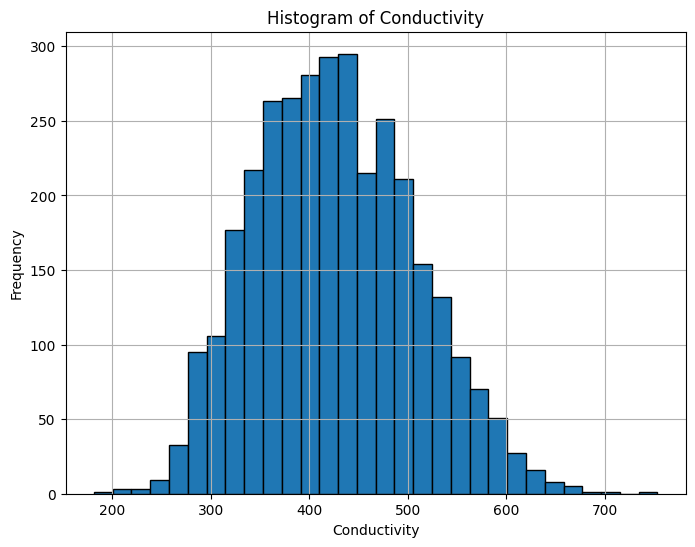

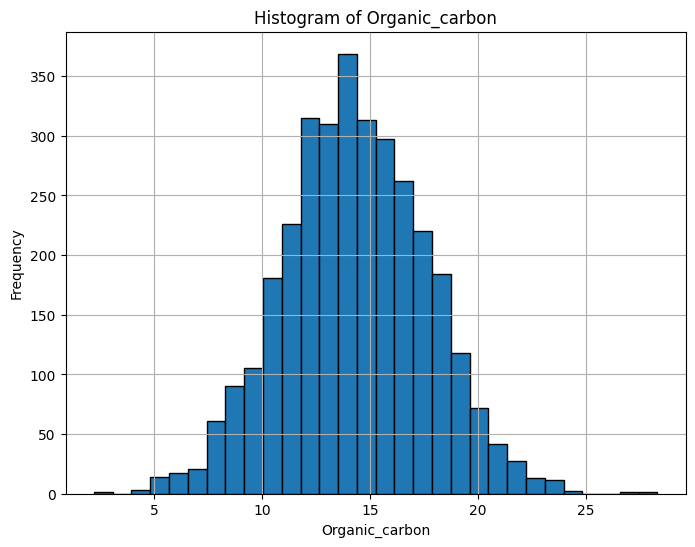

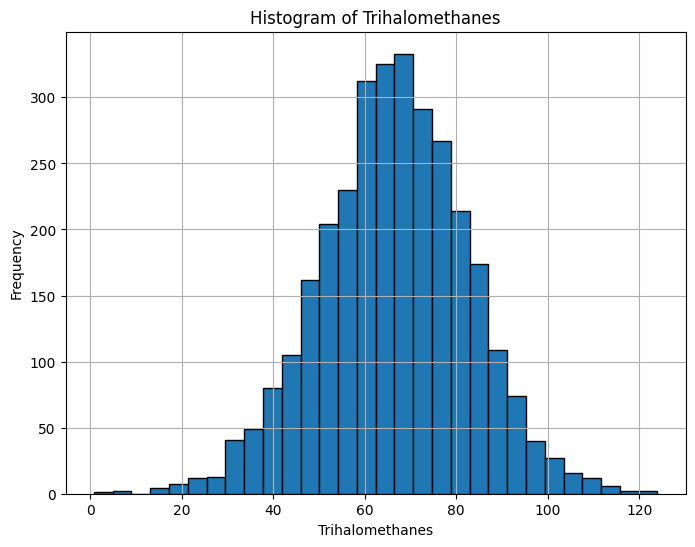

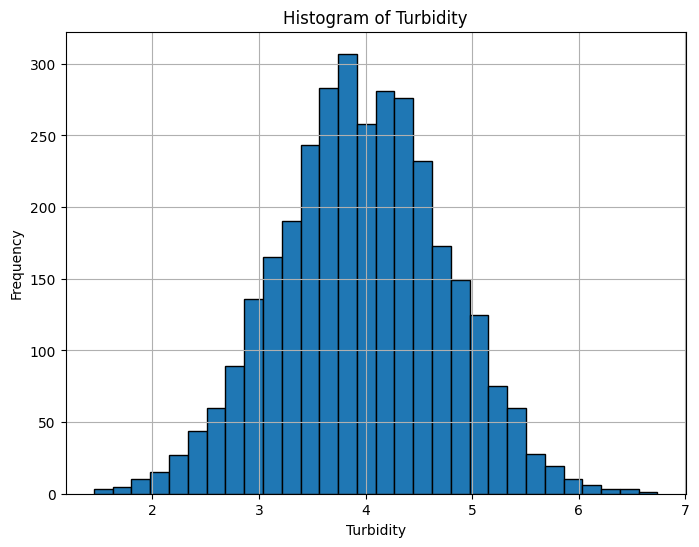

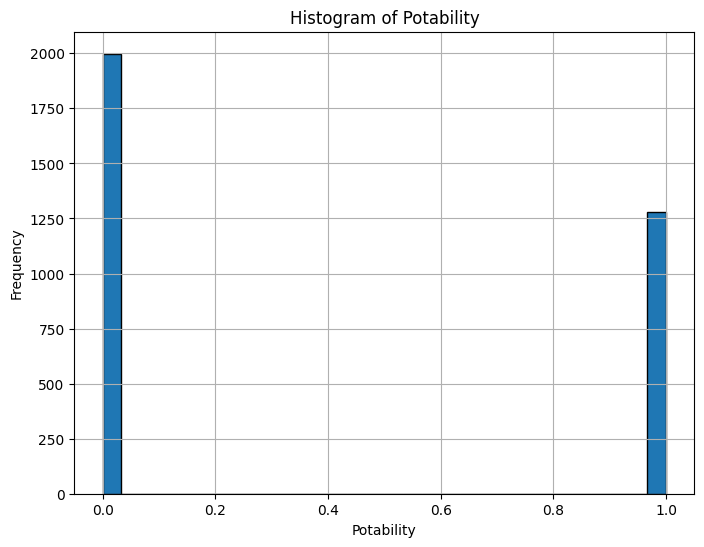

In [53]:
# --------------------------------------
# Plot histogram for each column (checking for gaussian distribution)
# --------------------------------------

for col in df.columns:
    # Plot histogram for each column
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

In [54]:
# --------------------------------------
# Separate data into features and target variable 
# --------------------------------------
scaler = StandardScaler()
df.dropna(inplace=True)
X = df.drop('Potability', axis=1)
X = scaler.fit_transform(X)
y = df['Potability']

#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("\n")


(1407, 9)
(1407,)
(604, 9)
(604,)




In [55]:
# --------------------------------------
# Linear Regression
# --------------------------------------

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

# finding accuracy , f1 , precision , cohen kappa score

lr_accuracy = accuracy_score(y_test, lr_y_pred.round())
lr_f1 = f1_score(y_test, lr_y_pred.round())
lr_precision = precision_score(y_test, lr_y_pred.round())
lr_cohen_kappa = cohen_kappa_score(y_test, lr_y_pred.round())

print("Linear Regression")
print("Accuracy: ", lr_accuracy)
print("F1 Score: ", lr_f1)
print("Precision: ", lr_precision)
print("Cohen Kappa Score: ", lr_cohen_kappa)


Linear Regression
Accuracy:  0.5943708609271523
F1 Score:  0.04669260700389105
Precision:  0.75
Cohen Kappa Score:  0.021581021395890132


In [56]:
# --------------------------------------
# Decision Tree
# --------------------------------------

dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42, splitter='best', max_leaf_nodes=10)
dt_reg.fit(X_train, y_train)
dt_y_pred = dt_reg.predict(X_test)

# finding accuracy , f1 , precision , cohen kappa score

dt_accuracy = accuracy_score(y_test, dt_y_pred.round())    
dt_f1 = f1_score(y_test, dt_y_pred.round())
dt_precision = precision_score(y_test, dt_y_pred.round())
dt_cohen_kappa = cohen_kappa_score(y_test, dt_y_pred.round())

print("Decision Tree")
print("Accuracy: ", dt_accuracy)
print("F1 Score: ", dt_f1)
print("Precision: ", dt_precision)
print("Cohen Kappa Score: ", dt_cohen_kappa)

Decision Tree
Accuracy:  0.640728476821192
F1 Score:  0.3483483483483483
Precision:  0.6904761904761905
Cohen Kappa Score:  0.1772253609541744


In [57]:
# --------------------------------------
# Random Forest Regressor
# --------------------------------------

forest_reg = RandomForestRegressor(n_estimators=150, random_state=42,)
forest_reg.fit(X_train, y_train)



RandomForestRegressor(n_estimators=150, random_state=42)

In [58]:

forest_scores = cross_val_score(forest_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)

print(forest_scores)


[-0.21205768 -0.204974   -0.20737526 -0.19310922 -0.21491915 -0.22216296
 -0.23223861 -0.2131054  -0.22313524 -0.19916889]


In [59]:
print(y_test.unique())

[0 1]


In [60]:
# accuracy score
forest_pred_prob = forest_reg.predict(X_test)
forest_pred = (forest_pred_prob > 0.4).astype(int)
forest_acc = accuracy_score(y_test, forest_pred)
print(forest_acc)

0.6341059602649006


Text(0.5, 1.0, 'Threshold vs Accuracy')

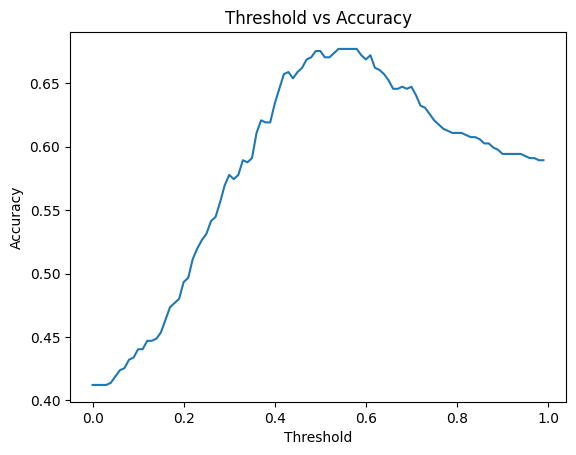

In [61]:
# finsding the right threshold
thresholds = np.arange(0, 1, 0.01)
acc_scores = []
for t in thresholds:
    forest_pred = (forest_pred_prob > t).astype(int)
    acc = accuracy_score(y_test, forest_pred)
    acc_scores.append(acc)

plt.plot(thresholds, acc_scores)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')

In [62]:
# best threshold
best_threshold = thresholds[np.argmax(acc_scores)]
print('Best Threshold:', best_threshold)


forest_pred_prob = forest_reg.predict(X_test)
forest_pred = (forest_pred_prob > 0.54).astype(int)
forest_acc = accuracy_score(y_test, forest_pred)
print(forest_acc)

Best Threshold: 0.54
0.6771523178807947


In [63]:
# finding accuracy , f1 , precision , cohen kappa score

forest_accuracy = accuracy_score(y_test, forest_pred.round())
forest_f1 = f1_score(y_test, forest_pred.round())
forest_precision = precision_score(y_test, forest_pred.round())
forest_cohen_kappa = cohen_kappa_score(y_test, forest_pred.round())

print("Random Forest Regressor")
print("Accuracy: ", forest_accuracy)
print("F1 Score: ", forest_f1)
print("Precision: ", forest_precision)
print("Cohen Kappa Score: ", forest_cohen_kappa)

Random Forest Regressor
Accuracy:  0.6771523178807947
F1 Score:  0.4935064935064935
Precision:  0.6985294117647058
Cohen Kappa Score:  0.28536757032254934


In [64]:
# --------------------------------------
# XGBoost Classifier
# --------------------------------------

xgb = XGBClassifier(n_estimators=200,
                     random_state=42, 
                     learning_rate=0.01, 
                     max_depth=10, 
                     objective='binary:logistic')
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

# finding accuracy , f1 , precision , cohen kappa score

xgb_accuracy = accuracy_score(y_test, xgb_y_pred.round())
xgb_f1 = f1_score(y_test, xgb_y_pred.round())
xgb_precision = precision_score(y_test, xgb_y_pred.round())
xgb_cohen_kappa = cohen_kappa_score(y_test, xgb_y_pred.round())

print("XGBoost Classifier")
print("Accuracy: ", xgb_accuracy)
print("F1 Score: ", xgb_f1)
print("Precision: ", xgb_precision)
print("Cohen Kappa Score: ", xgb_cohen_kappa)


XGBoost Classifier
Accuracy:  0.6705298013245033
F1 Score:  0.5227817745803357
Precision:  0.6488095238095238
Cohen Kappa Score:  0.28541532900525557


In [65]:
# --------------------------------------
# Support Vector Regressor
# --------------------------------------

svr = SVR(kernel='rbf', C=5, gamma='scale', epsilon=.1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# finding accuracy , f1 , precision , cohen kappa score

svr_accuracy = accuracy_score(y_test, y_pred.round())


print("Support Vector Regressor")
print("Accuracy: ", svr_accuracy)


Support Vector Regressor
Accuracy:  0.6721854304635762


Linaer Regression


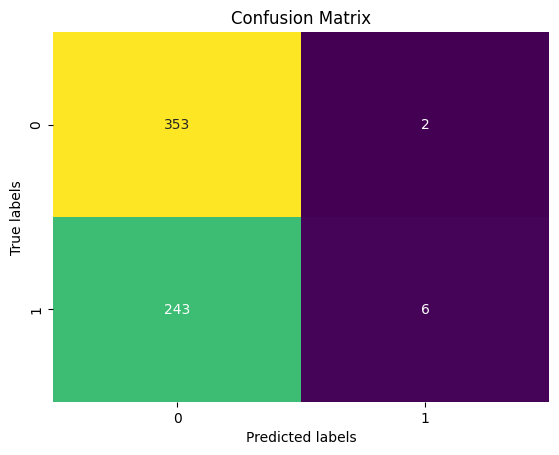



Decision Tree


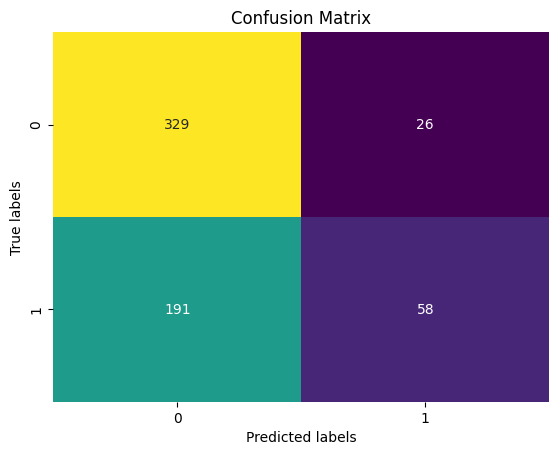



Random Forest Regressor


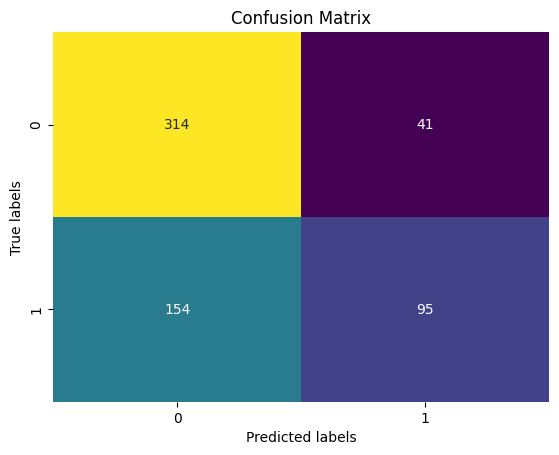



XGBoost Classifier


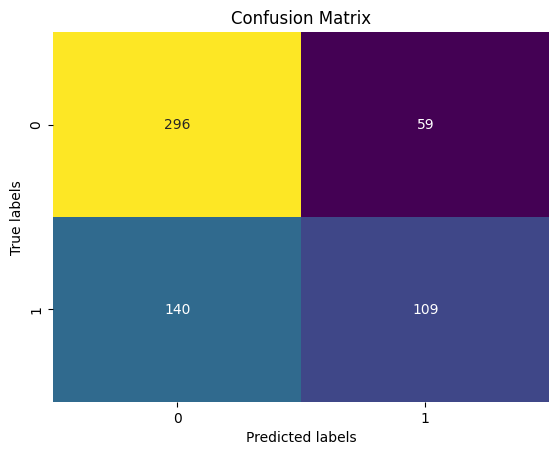



Support Vector Regressor


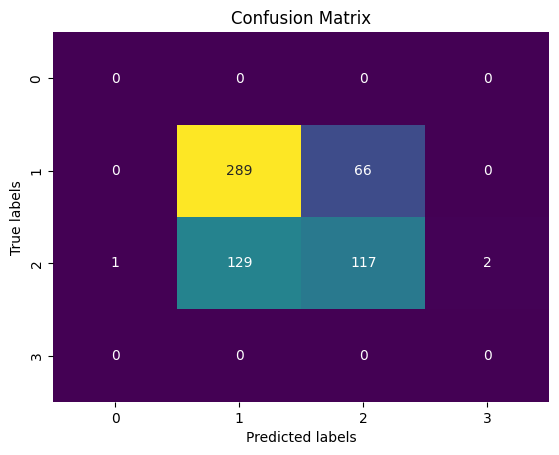

In [70]:
# --------------------------------------
# Confusion Matrix For Each Model 
# --------------------------------------

# Linear Regression
cm_lr = (confusion_matrix(y_test, lr_y_pred.round()), "Linaer Regression")
cm_dt = (confusion_matrix(y_test, dt_y_pred.round()), "Decision Tree")
cm_forest = (confusion_matrix(y_test, forest_pred.round()), "Random Forest Regressor")
cm_xgb = (confusion_matrix(y_test, xgb_y_pred.round()), "XGBoost Classifier")
cm_svr = (confusion_matrix(y_test, y_pred.round()), "Support Vector Regressor")

for cm in [cm_lr, cm_dt, cm_forest, cm_xgb, cm_svr]:
    print(cm[1])
    sns.heatmap(cm[0], annot=True, cmap='viridis', fmt='d', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    print("\n")


                      Model  Accuracy  F1 Score  Precision  Cohen Kappa Score
0         Linear Regression  0.594371  0.046693   0.750000           0.021581
1             Decision Tree  0.640728  0.348348   0.690476           0.177225
2   Random Forest Regressor  0.677152  0.493506   0.698529           0.285368
3        XGBoost Classifier  0.670530  0.522782   0.648810           0.285415
4  Support Vector Regressor  0.672185  0.000000   0.000000           0.000000


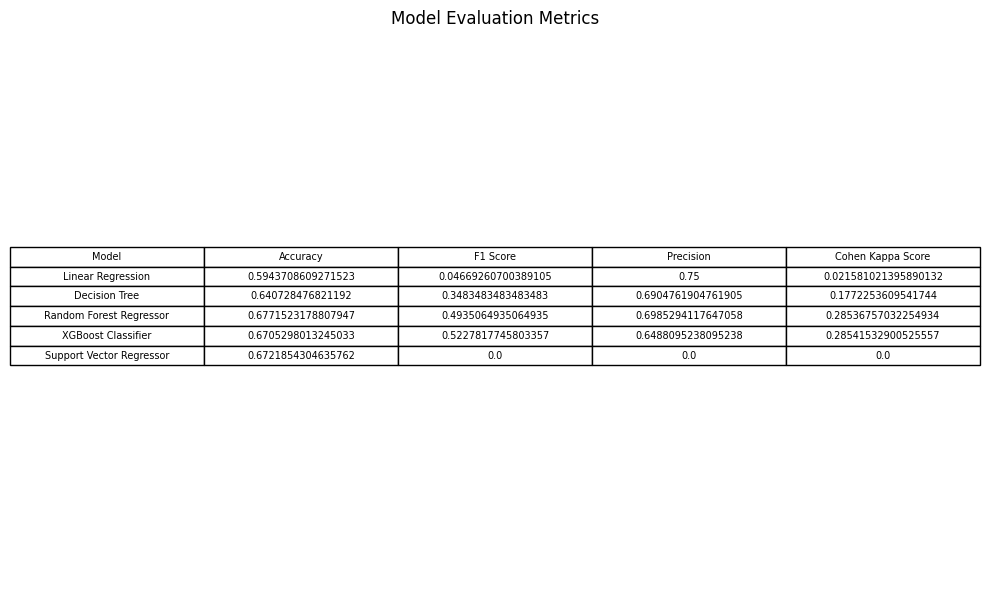

In [72]:
# --------------------------------------
# Comparing Models
# --------------------------------------

models = ['Linear Regression', 'Decision Tree', 'Random Forest Regressor', 'XGBoost Classifier', 'Support Vector Regressor']
accuracy = [lr_accuracy, dt_accuracy, forest_accuracy, xgb_accuracy, svr_accuracy]
f1 = [lr_f1, dt_f1, forest_f1, xgb_f1, 0]
precision = [lr_precision, dt_precision, forest_precision, xgb_precision, 0]
cohen_kappa = [lr_cohen_kappa, dt_cohen_kappa, forest_cohen_kappa, xgb_cohen_kappa, 0]

metrics_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Cohen Kappa Score': cohen_kappa})

print(metrics_df)

plt.figure(figsize=(10, 6))
plt.axis('off')  
plt.table(cellText=metrics_df.values,
          colLabels=metrics_df.columns,
          cellLoc='center',
          loc='center')
plt.title('Model Evaluation Metrics')
plt.tight_layout()
plt.show()

In [73]:
# --------------------------------------
# Hyperparameter Tuning of XGBoost Classifier
# --------------------------------------


# Define the parameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator and predict on test data
best_xgb = grid_search.best_estimator_
best_xgb_y_pred = best_xgb.predict(X_test)

# Evaluate performance metrics with best estimator
best_xgb_accuracy = accuracy_score(y_test, best_xgb_y_pred.round())
best_xgb_f1 = f1_score(y_test, best_xgb_y_pred.round())
best_xgb_precision = precision_score(y_test, best_xgb_y_pred.round())
best_xgb_cohen_kappa = cohen_kappa_score(y_test, best_xgb_y_pred.round())

print("\nBest XGBoost Classifier after Grid Search")
print("Accuracy: ", best_xgb_accuracy)
print("F1 Score: ", best_xgb_f1)
print("Precision: ", best_xgb_precision)
print("Cohen Kappa Score: ", best_xgb_cohen_kappa)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

Best XGBoost Classifier after Grid Search
Accuracy:  0.6804635761589404
F1 Score:  0.5162907268170426
Precision:  0.6866666666666666
Cohen Kappa Score:  0.29900899600711983


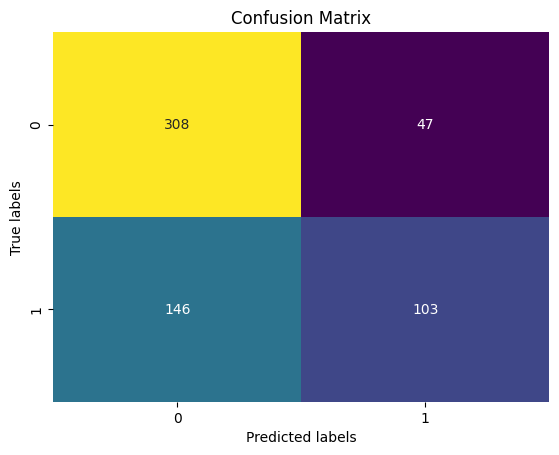

In [74]:
# --------------------------------------
# Confusion Matrix For Best XGBoost Classifier
# --------------------------------------

cm_best_xgb = confusion_matrix(y_test, best_xgb_y_pred.round())
sns.heatmap(cm_best_xgb, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_28948\361535149.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


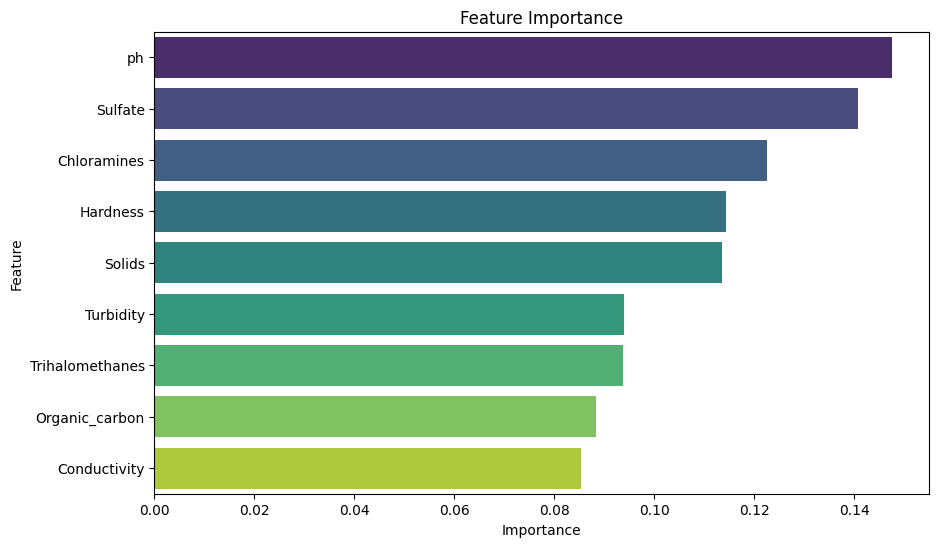

In [75]:
# --------------------------------------
# Feature Importance
# --------------------------------------

feature_importance = best_xgb.feature_importances_
features_df = pd.DataFrame({'Feature': df.drop('Potability', axis=1).columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [80]:
# --------------------------------------
# Save Model
# --------------------------------------

joblib.dump(best_xgb, 'water_quality_pred_xgb_model.joblib')




['water_quality_pred_xgb_model.joblib']